In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [20]:
"""
# R-code for loading and saving the hormone database in .csv format
library("bootstrap")
write.csv(hormone, 'hormone.csv')
"""

'\n# R-code for loading and saving the hormone database in .csv format\nlibrary("bootstrap")\nwrite.csv(hormone, \'hormone.csv\')\n'

In [21]:
# Reading the hormone dataset Page 107 : Efron Book
hormone_data = pd.read_csv('hormone.csv', delimiter=',', index_col=0)

In [22]:
hormone_data

Lot  hrs  amount
1    A   99    25.8
2    A  152    20.5
3    A  293    14.3
4    A  155    23.2
5    A  196    20.6
6    A   53    31.1
7    A  184    20.9
8    A  171    20.9
9    A   52    30.4
10   B  376    16.3
11   B  385    11.6
12   B  402    11.8
13   B   29    32.5
14   B   76    32.0
15   B  296    18.0
16   B  151    24.1
17   B  177    26.5
18   B  209    25.8
19   C  119    28.8
20   C  188    22.0
21   C  115    29.7
22   C   88    28.9
23   C   58    32.8
24   C   49    32.5
25   C  150    25.4
26   C  107    31.7
27   C  125    28.5

Text(0,0.5,'amount')

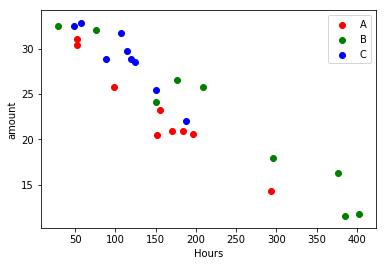

In [23]:
# Figure 9.1
plt.figure()
plt.scatter(hormone_data[hormone_data['Lot'] == 'A']['hrs'], hormone_data[hormone_data['Lot'] == 'A']['amount'], c='r')
plt.scatter(hormone_data[hormone_data['Lot'] == 'B']['hrs'], hormone_data[hormone_data['Lot'] == 'B']['amount'], c='g')
plt.scatter(hormone_data[hormone_data['Lot'] == 'C']['hrs'], hormone_data[hormone_data['Lot'] == 'C']['amount'], c='b')
plt.legend(['A', 'B', 'C'])
plt.xlabel('Hours')
plt.ylabel('amount')

## Problem 17.8 
(a) Carry out a bootstrap analysis for the hormone data,
like the one in Table 17.1, using B = 100 bootstrap samples.
In addition, calculate the average prediction error €0 for observations that do not appear in the bootstrap
sample used for their prediction. Hence compute the .632
estimator for these data.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

len_data = len(hormone_data)
X_lotA = np.array(hormone_data[hormone_data['Lot'] == 'A']['hrs']).reshape(-1,1)
X_lotB = np.array(hormone_data[hormone_data['Lot'] == 'B']['hrs']).reshape(-1,1)
X_lotC = np.array(hormone_data[hormone_data['Lot'] == 'C']['hrs']).reshape(-1,1)

y_lotA = np.array(hormone_data[hormone_data['Lot'] == 'A']['amount']).reshape(-1,1)
y_lotB = np.array(hormone_data[hormone_data['Lot'] == 'B']['amount']).reshape(-1,1)
y_lotC = np.array(hormone_data[hormone_data['Lot'] == 'C']['amount']).reshape(-1,1)

### Prediction Error after training on Hormone dataset

In [25]:

from sklearn.metrics import mean_squared_error

X = np.zeros((27, 4))

X[:,0] = np.array(hormone_data['hrs'], dtype=np.float)
X[0:9, 1] = np.ones((9))
X[9:18,2] = np.ones((9))
X[18:27,3] = np.ones((9))

y = np.array(hormone_data['amount']).reshape(-1, 1)

In [26]:
regr = LinearRegression(fit_intercept=False)

regr.fit(X, y)
RSE = mean_squared_error(y, regr.predict(X))
RSE

2.1952182295633147

In [27]:
print("Prediction Error: %f" % RSE)

Prediction Error: 2.195218


### Naive Bootstrap Estimate

In [28]:

B = 400
NaiveBSResults_df = pd.DataFrame(index=np.arange(B), columns=['Prediction Error', 'Apparent Error', 'Optimism'], dtype=np.float)
NaiveBS_df = pd.DataFrame(index=np.arange(1, len_data+1), columns=np.arange(B))

for rep in range(B):

    b_idxs = np.random.choice(a=np.arange(1, len_data+1), size=len_data, replace=True)
    NaiveBS_df.loc[:, rep] = b_idxs
    b_data = hormone_data.loc[b_idxs]

    # Fitting each lot
    PE_original = 0
    PE_boot = 0

    X_boot = np.zeros((27,4))
    X_boot[:, 0] = np.array(b_data['hrs'], dtype=np.float)

    y_boot = np.array(b_data['amount'], dtype=np.float)

    lot_data = list(b_data['Lot'])

    for idx in range(len(lot_data)):
        if lot_data[idx] == 'A':
            X_boot[idx, 1] = 1
        elif lot_data[idx] == 'B':
            X_boot[idx, 2] = 1
        elif lot_data[idx] == 'C':
            X_boot[idx, 3] = 1

    regr = LinearRegression(fit_intercept=False)
    regr.fit(X_boot, y_boot)

    y_pred = regr.predict(X)
    y_pred_boot = regr.predict(X_boot)

    PE_original = mean_squared_error(y_true=y, y_pred=y_pred)
    PE_boot = mean_squared_error(y_true=y_boot, y_pred=y_pred_boot)

    NaiveBSResults_df.loc[rep, 'Prediction Error'] = PE_original
    NaiveBSResults_df.loc[rep, 'Apparent Error'] = PE_boot
    NaiveBSResults_df.loc[rep, 'Optimism'] = PE_original - PE_boot

In [29]:
NaiveBSResults_df

Prediction Error  Apparent Error  Optimism
0            2.558013        1.237784  1.320229
1            2.295050        1.615614  0.679436
2            2.711770        2.033064  0.678706
3            2.604423        2.084908  0.519515
4            2.764573        1.077702  1.686871
5            2.336437        0.728864  1.607573
6            2.424809        1.931757  0.493052
7            2.264300        1.585722  0.678578
8            2.823836        1.293975  1.529862
9            2.731266        2.010310  0.720956
10           2.649381        2.049094  0.600287
11           3.567244        1.756596  1.810649
12           2.940591        1.717734  1.222857
13           2.720257        1.713162  1.007096
14           2.318832        0.958755  1.360077
15           2.632218        2.364754  0.267464
16           2.658831        2.138693  0.520138
17           2.279626        2.269688  0.009938
18           2.712521        1.937644  0.774877
19           2.631399        1.761830  0.869569
20           3.626148        2.034037  1.592111
21           2.469423        1.691225  0.778198
22           2.869342        1.874580  0.994762
23           2.333729        1.299290  1.034439
24           2.548977        1.675325  0.873651
25           2.683754        1.843256  0.840498
26           2.493428        2.407372  0.086056
27           2.297504        1.967118  0.330386
28           2.430647        1.765758  0.664889
29           2.465316        2.339460  0.125856
..                ...             ...       ...
370          2.269351        1.839772  0.429579
371          2.585629        2.812355 -0.226726
372          2.519148        1.972490  0.546658
373          2.278443        1.333384  0.945059
374          2.645510        2.115376  0.530134
375          2.733778        1.278651  1.455127
376          2.630493        2.064736  0.565757
377          3.600980        2.122407  1.478574
378          2.355322        1.137381  1.217942
379          2.338581        2.874156 -0.535575
380          2.663133        2.210561  0.452571
381          2.704365        2.042265  0.662100
382          2.269668        2.269576  0.000092
383          4.650086        1.232705  3.417381
384          2.489769        1.493352  0.996417
385          2.224082        1.742451  0.481630
386          2.311469        1.696091  0.615377
387          4.129324        1.253531  2.875792
388          3.209058        1.377293  1.831765
389          2.222089        2.795300 -0.573212
390          2.310946        2.458244 -0.147298
391          2.439417        2.348453  0.090964
392          2.375438        1.513634  0.861804
393          2.971514        1.257283  1.714231
394          2.893966        1.365571  1.528396
395          2.435453        2.074818  0.360635
396          2.458607        1.216289  1.242318
397          2.899266        1.709204  1.190062
398          2.366574        1.740729  0.625845
399          2.411124        1.646855  0.764269

[400 rows x 3 columns]

In [30]:
NaiveBSResults_df.mean()

Prediction Error    2.671607
Apparent Error      1.826374
Optimism            0.845233
dtype: float64

In [31]:
print("Bootstrap Estimate of Prediction Error: %f" % NaiveBSResults_df['Prediction Error'].mean())

Bootstrap Estimate of Prediction Error: 2.671607


### Refined BootStrap Estimate

In [32]:
RefinedBSEstimate = RSE + NaiveBSResults_df["Optimism"].mean()
print("Refined Bootstrap estimate of prediction Error: %f" % RefinedBSEstimate)

Refined Bootstrap estimate of prediction Error: 3.040452


### Calculating Epsilon_0

In [33]:
eps_dict = {x:[] for x in np.arange(1, len_data+1)}

for obs in np.arange(1, len_data+1):  # Looping over each observation
    for b in range(B):  # Looping over bootstrap sample
        if obs not in np.array(NaiveBS_df[b]): # Check if the observation appear in corresponding bootstrap sample
            eps_dict[obs].append(b)


eps_err = []
for eps in eps_dict:

    err = 0
    for bs_sample_idx in eps_dict[eps]:

        b_idxs = NaiveBS_df[bs_sample_idx]

        b_data = hormone_data.loc[b_idxs]

        X_boot = np.zeros((27, 4))
        X_boot[:, 0] = np.array(b_data['hrs'], dtype=np.float)

        y_boot = np.array(b_data['amount'], dtype=np.float)

        lot_data = list(b_data['Lot'])

        for idx in range(len(lot_data)):
            if lot_data[idx] == 'A':
                X_boot[idx, 1] = 1
            elif lot_data[idx] == 'B':
                X_boot[idx, 2] = 1
            elif lot_data[idx] == 'C':
                X_boot[idx, 3] = 1

        regr = LinearRegression(fit_intercept=False)
        regr.fit(X_boot, y_boot)

        y_pred = regr.predict(X[eps-1,:].reshape(1, -1))

        err += (y[eps-1] - y_pred)**2

    if len(eps_dict[eps]) > 0:
        err = err/len(eps_dict[eps])
    eps_err.append(err)

eps_0 = np.mean(eps_err)

In [34]:
print("Average error rate from bootstrap data sets not contatining the point being predicted: %f" % eps_0)

Average error rate from bootstrap data sets not contatining the point being predicted: 3.770541


In [35]:
estimator_632 = (0.368 * RSE) + (0.632 * eps_0)

In [36]:
print(".632 estimate of prediction error: %f" % estimator_632)

.632 estimate of prediction error: 3.190822


## Results

In [ ]:
print("Prediction Error: %f" % RSE)
print("Bootstrap Estimate of Prediction Error: %f" % NaiveBSResults_df['Prediction Error'].mean())
print("Refined Bootstrap estimate of prediction Error: %f" % RefinedBSEstimate)
print("Average error rate from bootstrap data sets not containing the point being predicted: %f" % eps_0)
print(".632 estimate of prediction error: %f" % estimator_632)

Prediction Error: 2.195218
Bootstrap Estimate of Prediction Error: 2.671607
Refined Bootstrap estimate of prediction Error: 3.040452
Average error rate from bootstrap data sets not containing the point being predicted: 3.770541
.632 estimate of prediction error: 3.190822


In [ ]:
# Calculation epsilon0, epsilon1, ....
epsilon_range = 27
eps_dict_list = [{x:[] for x in np.arange(1, len_data+1)} for i in range(epsilon_range)]

for i in range(epsilon_range):
    eps_dict = eps_dict_list[i]

    for obs in np.arange(1, len_data+1):  # Looping over each observation
        for b in range(B):  # Looping over bootstrap sample
            if i == list(NaiveBS_df[b]).count(obs): # Check if the observation appear in corresponding bootstrap sample
                eps_dict[obs].append(b)

eps_err_list = [0 for i in range(epsilon_range)]

for i in range(epsilon_range):

    eps_dict = eps_dict_list[i]

    eps_err = []
    for eps in eps_dict:

        err = 0
        for bs_sample_idx in eps_dict[eps]:

            b_idxs = NaiveBS_df[bs_sample_idx]

            b_data = hormone_data.loc[b_idxs]

            X_boot = np.zeros((27, 4))
            X_boot[:, 0] = np.array(b_data['hrs'], dtype=np.float)

            y_boot = np.array(b_data['amount'], dtype=np.float)

            lot_data = list(b_data['Lot'])

            for idx in range(len(lot_data)):
                if lot_data[idx] == 'A':
                    X_boot[idx, 1] = 1
                elif lot_data[idx] == 'B':
                    X_boot[idx, 2] = 1
                elif lot_data[idx] == 'C':
                    X_boot[idx, 3] = 1

            regr = LinearRegression(fit_intercept=False)
            regr.fit(X_boot, y_boot)

            y_pred = regr.predict(X[eps-1,:].reshape(1, -1))

            err += (y[eps-1] - y_pred)**2

        if len(eps_dict[eps]) > 0:
            err = err/len(eps_dict[eps])
        eps_err.append(err)

    eps_err_list[i] = np.mean(eps_err)

In [ ]:
plt.figure()
plt.scatter(range(epsilon_range), eps_err_list)